[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Dataset Loaded Successfully
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
Dataset Shape: (50000, 2)

Sentiment Distribution:
sentiment
1    25000
0    25000
Name: count, dtype: int64

Cleaning text data...
Train-Test Split Completed
Model Training Completed

Model Accuracy: 0.8921

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4961
           1       0.88      0.91      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



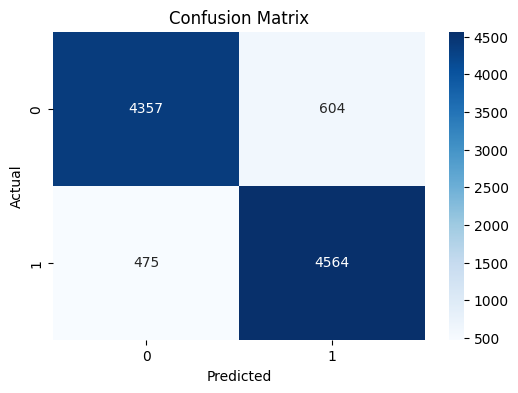


Custom Predictions:
Review: This movie was amazing and entertaining
Sentiment: Positive
Review: The movie was boring and a waste of time
Sentiment: Negative

TASK-4 SENTIMENT ANALYSIS COMPLETED SUCCESSFULLY


In [3]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Download stopwords (run once)
nltk.download('stopwords')

# ================================
# 1. LOAD DATASET (ROBUST METHOD)
# ================================
df = pd.read_csv(
    "IMDB Dataset.csv",
    engine="python",
    on_bad_lines="skip"
)

print("Dataset Loaded Successfully")
print(df.head())
print("Dataset Shape:", df.shape)

# ================================
# 2. LABEL ENCODING
# ================================
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

print("\nSentiment Distribution:")
print(df['sentiment'].value_counts())

# ================================
# 3. TEXT PREPROCESSING
# ================================
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

print("\nCleaning text data...")
df['cleaned_review'] = df['review'].apply(clean_text)

# ================================
# 4. FEATURE EXTRACTION (TF-IDF)
# ================================
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_review'])
y = df['sentiment']

# ================================
# 5. TRAIN-TEST SPLIT
# ================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train-Test Split Completed")

# ================================
# 6. MODEL TRAINING
# ================================
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

print("Model Training Completed")

# ================================
# 7. PREDICTION & EVALUATION
# ================================
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ================================
# 8. CONFUSION MATRIX
# ================================
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ================================
# 9. CUSTOM SENTIMENT PREDICTION
# ================================
def predict_sentiment(text):
    text = clean_text(text)
    vector = vectorizer.transform([text])
    prediction = model.predict(vector)
    return "Positive" if prediction[0] == 1 else "Negative"

print("\nCustom Predictions:")
print("Review: This movie was amazing and entertaining")
print("Sentiment:", predict_sentiment("This movie was amazing and entertaining"))

print("Review: The movie was boring and a waste of time")
print("Sentiment:", predict_sentiment("The movie was boring and a waste of time"))

print("\nTASK-4 SENTIMENT ANALYSIS COMPLETED SUCCESSFULLY")
